In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np

In [2]:
# load up emotional content
emot = pandas.read_csv("DATA/GT_10_STORIES/positiv_negativ.csv")

In [3]:
emot.columns

Index([u'Unnamed: 0', u'url', u'body', u'body_upper', u'wc', u'negativ_ct',
       u'positiv_ct', u'negativ_percent', u'positiv_percent', u'emotionality',
       u'positivity'],
      dtype='object')

In [4]:
print len(emot)
print len(set(emot.url))

2718
2718


In [6]:
stories = pandas.read_csv('DATA/GT_10_STORIES/sentiment_numtweets.csv')

In [7]:
print len(stories)
print len(set(stories.url))

2658
2658


In [8]:
merged = pandas.merge(stories, emot, how='inner', left_on='url', right_on='url')

In [9]:
len(set(merged.url))

2651

In [12]:
dropdupes = merged.drop_duplicates('url')
len(dropdupes)

2651

## Some basic descriptives

In [35]:
len(dropdupes)

2651

In [11]:
dropdupes.columns

Index([u'Unnamed: 0_x', u'url', u'title', u'sentiment_mean', u'num_tweets',
       u'Unnamed: 0_y', u'body', u'body_upper', u'wc', u'negativ_ct',
       u'positiv_ct', u'negativ_percent', u'positiv_percent', u'emotionality',
       u'positivity'],
      dtype='object')

In [50]:
dropdupes.num_tweets.describe()

count    2651.000000
mean       46.365900
std        60.230918
min        10.000000
25%        15.000000
50%        26.000000
75%        52.000000
max      1261.000000
Name: num_tweets, dtype: float64

In [40]:
dropdupes.sentiment_mean.describe()

count    2651.000000
mean        0.172562
std         0.530127
min        -1.000000
25%        -0.025158
50%         0.071429
75%         0.615385
max         1.000000
Name: sentiment_mean, dtype: float64

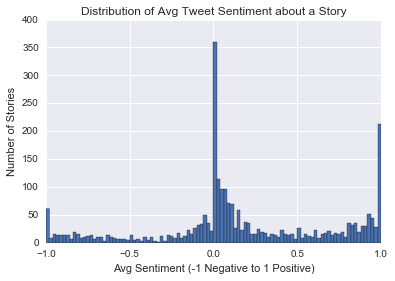

In [44]:
dropdupes.sentiment_mean.hist(bins=100)
plt.title('Distribution of Avg Tweet Sentiment about a Story')
plt.ylabel('Number of Stories')
plt.xlabel('Avg Sentiment (-1 Negative to 1 Positive)')
plt.savefig('FIGS/CORR/mean_sent_hist.png')

In [41]:
dropdupes.wc.describe()

count     2651.000000
mean       968.708035
std        812.935257
min          0.000000
25%        392.500000
50%        797.000000
75%       1414.000000
max      19008.000000
Name: wc, dtype: float64

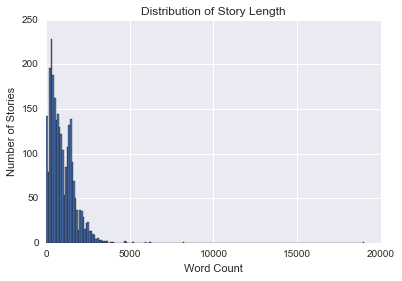

In [49]:
dropdupes.wc.hist(bins=200)
plt.title('Distribution of Story Length')
plt.ylabel('Number of Stories')
plt.xlabel('Word Count')
plt.savefig('FIGS/CORR/wc_hist.png')

count     2651.000000
mean       968.708035
std        812.935257
min          0.000000
25%        392.500000
50%        797.000000
75%       1414.000000
max      19008.000000
Name: wc, dtype: float64

## Calculate pearson r correlation

In [13]:
from scipy.stats import pearsonr

In [16]:
pearsonr(dropdupes.positiv_ct, dropdupes.num_tweets)

(-0.033154920943169623, 0.087870366915406117)

In [17]:
pearsonr(dropdupes.negativ_ct, dropdupes.num_tweets)

(-0.0038466478223945547, 0.8430740128697416)

In [18]:
pearsonr(dropdupes.wc, dropdupes.num_tweets)

(-0.056207048962737191, 0.0037927383852114252)

In [22]:
pearsonr(dropdupes.negativ_percent, dropdupes.num_tweets)

(nan, 1.0)

In [23]:
pearsonr(dropdupes.positiv_percent, dropdupes.num_tweets)

(nan, 1.0)

In [24]:
pearsonr(dropdupes.emotionality, dropdupes.num_tweets)

(nan, 1.0)

In [25]:
pearsonr(dropdupes.positivity, dropdupes.num_tweets)

(nan, 1.0)

In [64]:
dropdupes.to_csv('DATA/EMOT/all_fields_no_body.csv', 
                 columns=['url', 'title', 'sentiment_mean','num_tweets','wc',
                         'negativ_ct', 'positiv_ct', 'negativ_percent',
                         'positiv_percent', 'emotionality', 'positivity'])

In [66]:
len(dropdupes)

2651

In [65]:
dropdupes.to_csv('DATA/EMOT/all_fields_no_title.csv', 
                 columns=['url', 'sentiment_mean','num_tweets','wc',
                         'negativ_ct', 'positiv_ct', 'negativ_percent',
                         'positiv_percent', 'emotionality', 'positivity'])

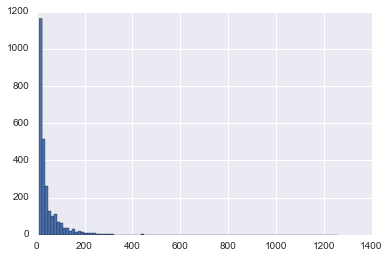

In [59]:
dropdupes.num_tweets.hist(bins=100)

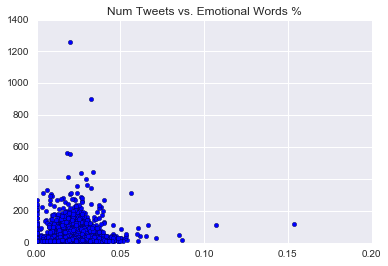

In [55]:
plt.scatter(dropdupes.emotionality, dropdupes.num_tweets)
plt.xlim([0,0.2])
plt.ylim([0,1400])
plt.title('Num Tweets vs. Emotional Words %')


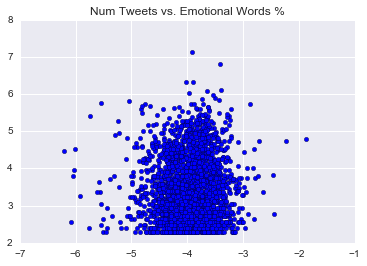

In [57]:
plt.scatter(np.log(dropdupes.emotionality), np.log(dropdupes.num_tweets))
plt.title('Num Tweets vs. Emotional Words %')
